<a href="https://colab.research.google.com/github/RaynoldPanjiZ/mushroom-classification/blob/master/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Download datasets

In [ ]:
!pip install -q kaggle
from google.colab import files 

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images

 99% 1.84G/1.85G [00:48<00:00, 41.3MB/s]
100% 1.85G/1.85G [00:48<00:00, 41.0MB/s]


In [ ]:
!mkdir datasets
!unzip -q mushrooms-classification-common-genuss-images.zip -d datasets

In [ ]:
!ls datasets/Mushrooms

Agaricus  Boletus      Entoloma   Lactarius  Suillus
Amanita   Cortinarius  Hygrocybe  Russula


In [ ]:
import zipfile,os
base_dir = 'datasets/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
dir = os.listdir(os.path.join(base_dir,'Mushrooms'))
dir

['Entoloma',
 'Russula',
 'Boletus',
 'Hygrocybe',
 'Amanita',
 'Suillus',
 'Agaricus',
 'Cortinarius',
 'Lactarius']

In [ ]:
# menyiapkan path direktory train dan val

train_img = []
val_img = []
for d in dir:
  train_img.append(os.path.join(train_dir, d))

for d in dir:
  val_img.append(os.path.join(validation_dir, d))

train_img, val_img

(['datasets/train/Entoloma',
  'datasets/train/Russula',
  'datasets/train/Boletus',
  'datasets/train/Hygrocybe',
  'datasets/train/Amanita',
  'datasets/train/Suillus',
  'datasets/train/Agaricus',
  'datasets/train/Cortinarius',
  'datasets/train/Lactarius'],
 ['datasets/val/Entoloma',
  'datasets/val/Russula',
  'datasets/val/Boletus',
  'datasets/val/Hygrocybe',
  'datasets/val/Amanita',
  'datasets/val/Suillus',
  'datasets/val/Agaricus',
  'datasets/val/Cortinarius',
  'datasets/val/Lactarius'])

In [ ]:
# membuat directory baru di dalam directory train dan val

for d in train_img:
  os.mkdir(d)
for d in val_img:
  os.mkdir(d)

In [ ]:
len(os.listdir(os.path.join('datasets/Mushrooms/',dir[0])))

364

In [ ]:
os.path.join(os.path.join(base_dir,'Mushrooms'), dir[0])

'datasets/Mushrooms/Entoloma'

In [ ]:
from sklearn.model_selection import train_test_split

b = os.path.join(base_dir,'Mushrooms')

train = {}
val = {}

for d in dir:
  train[d], val[d] = train_test_split(os.listdir(os.path.join(b, d)), test_size = 0.4)

In [ ]:
len(train['Agaricus']), len(val['Agaricus'])

(211, 142)

In [ ]:
list(train.keys())

['Entoloma',
 'Russula',
 'Boletus',
 'Hygrocybe',
 'Amanita',
 'Suillus',
 'Agaricus',
 'Cortinarius',
 'Lactarius']

In [ ]:
train_img

['datasets/train/Entoloma',
 'datasets/train/Russula',
 'datasets/train/Boletus',
 'datasets/train/Hygrocybe',
 'datasets/train/Amanita',
 'datasets/train/Suillus',
 'datasets/train/Agaricus',
 'datasets/train/Cortinarius',
 'datasets/train/Lactarius']

In [ ]:
val

In [ ]:
# memasukan data ke direktori train dan val
import shutil

for l, d in zip(list(train.keys()), train_img):
  for i in train[l]:
    shutil.copy(os.path.join(os.path.join(b, l), i), d)

for l, d in zip(list(val.keys()), val_img):
  for i in val[l]:
    shutil.copy(os.path.join(os.path.join(b, l), i), d)

In [ ]:
print(len(os.listdir(train_img[0])), len(train['Boletus']))
print(len(os.listdir(val_img[0])), len(val['Boletus']))

218 643
146 430


## Copy to drive

In [ ]:
from google.colab import drive
import shutil, os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
shutil.copytree("datasets/train", "/content/gdrive/MyDrive/datasets/mushroom/train")
shutil.copytree("datasets/val", "/content/gdrive/MyDrive/datasets/mushroom/val")

In [ ]:
os.mkdir("datasets")
shutil.copytree("/content/gdrive/MyDrive/datasets/mushroom/train", "datasets/train")
shutil.copytree("/content/gdrive/MyDrive/datasets/mushroom/val", "datasets/val")

'datasets/val'

In [ ]:
import zipfile,os
base_dir = 'datasets/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# menyiapkan path direktory train dan val

train_img = []
val_img = []
for d in os.listdir(train_dir):
  train_img.append(os.path.join(train_dir, d))

for d in os.listdir(validation_dir):
  val_img.append(os.path.join(validation_dir, d))

train_img, val_img

(['datasets/train/Amanita',
  'datasets/train/Russula',
  'datasets/train/Entoloma',
  'datasets/train/Suillus',
  'datasets/train/Agaricus',
  'datasets/train/Cortinarius',
  'datasets/train/Hygrocybe',
  'datasets/train/Boletus',
  'datasets/train/Lactarius'],
 ['datasets/val/Amanita',
  'datasets/val/Russula',
  'datasets/val/Entoloma',
  'datasets/val/Suillus',
  'datasets/val/Agaricus',
  'datasets/val/Cortinarius',
  'datasets/val/Hygrocybe',
  'datasets/val/Boletus',
  'datasets/val/Lactarius'])

# Pre Processing

In [ ]:
# Melakukan proses augmentasi gambar menggunakan Image Data Generator

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( 
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # vertical_flip = True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator( 
    rescale = 1./255
)

In [ ]:
img_height = 150
img_width = 150
batch_size = 20

In [ ]:
# menggunakan objek image data generator untuk mempersiapkan data train dan validation

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(img_width, img_height),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=batch_size, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(img_width, img_height), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=batch_size, 
        class_mode='categorical')

Found 4023 images belonging to 9 classes.
Found 2691 images belonging to 9 classes.


In [ ]:
train_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

In [ ]:
os.mkdir("model")

In [ ]:
import json
with open("model/labels_map.json", "w") as json_file:
    json_file.write(json.dumps(train_generator.class_indices))

## Load labels
f = open('model/labels_map.json')
labels = json.load(f)

In [ ]:
labels.keys()

dict_keys(['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus'])

# Training

In [ ]:
from keras.applications.resnet50v2 import ResNet50V2
from keras.applications.efficientnetB0 import EfficientNetB0
from keras.applications.mobilenetv2 import MobileNetV2

base_model = ResNet50V2(
    input_shape = (150, 150, 3), 
    include_top = False,
    weights = 'imagenet'
)

base_model.trainable = False
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 3)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
lr = 0.0001

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=9, activation='softmax')
])

model.compile(
    optimizer = Adam(learning_rate=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,764,553
Trainable params: 1,049,865
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

4

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_generator)

135/135 [==============================] - 36s 183ms/step - loss: 2.6370 - accuracy: 0.1211


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.64
initial accuracy: 0.12


In [ ]:
## training model
hist = model.fit(
    train_generator,  
    epochs=initial_epochs,
    validation_data=validation_generator,
    # callbacks=[callbacks],
    verbose=1
)

Epoch 1/10
202/202 [==============================] - 82s 400ms/step - loss: 1.8733 - accuracy: 0.3254 - val_loss: 1.7102 - val_accuracy: 0.3820
Epoch 2/10
202/202 [==============================] - 77s 382ms/step - loss: 1.6136 - accuracy: 0.4298 - val_loss: 1.5511 - val_accuracy: 0.4400
Epoch 3/10
202/202 [==============================] - 77s 380ms/step - loss: 1.4978 - accuracy: 0.4703 - val_loss: 1.5232 - val_accuracy: 0.4571
Epoch 4/10
202/202 [==============================] - 81s 402ms/step - loss: 1.4368 - accuracy: 0.4902 - val_loss: 1.4642 - val_accuracy: 0.4883
Epoch 5/10
202/202 [==============================] - 77s 381ms/step - loss: 1.3829 - accuracy: 0.5116 - val_loss: 1.4492 - val_accuracy: 0.4879
Epoch 6/10
202/202 [==============================] - 77s 383ms/step - loss: 1.3349 - accuracy: 0.5339 - val_loss: 1.4330 - val_accuracy: 0.4879
Epoch 7/10
202/202 [==============================] - 76s 376ms/step - loss: 1.2826 - accuracy: 0.5516 - val_loss: 1.3967 - val_ac

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

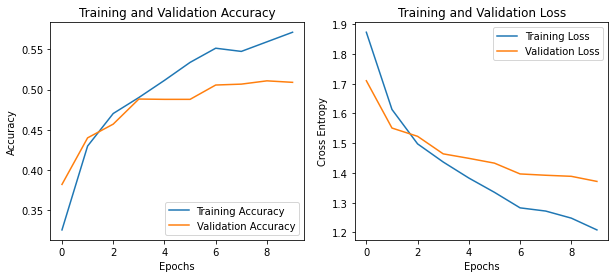

In [ ]:
# melihat hasil plot accuracy dan loss
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.show()

# Fine-Tuning

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  19


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 10

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=lr/10),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,764,553
Trainable params: 14,029,065
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

16

In [ ]:
hist.epoch[-1]

9

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

hist_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=hist.epoch[-1],
    validation_data=validation_generator
)

Epoch 10/20
202/202 [==============================] - 79s 382ms/step - loss: 1.1147 - accuracy: 0.6115 - val_loss: 1.2011 - val_accuracy: 0.5845
Epoch 11/20
202/202 [==============================] - 78s 387ms/step - loss: 0.9547 - accuracy: 0.6684 - val_loss: 1.1736 - val_accuracy: 0.5916
Epoch 12/20
202/202 [==============================] - 77s 381ms/step - loss: 0.8688 - accuracy: 0.6995 - val_loss: 1.1134 - val_accuracy: 0.6210
Epoch 13/20
202/202 [==============================] - 78s 386ms/step - loss: 0.7693 - accuracy: 0.7308 - val_loss: 1.1200 - val_accuracy: 0.6276
Epoch 14/20
202/202 [==============================] - 77s 380ms/step - loss: 0.7433 - accuracy: 0.7435 - val_loss: 1.1174 - val_accuracy: 0.6325
Epoch 15/20
202/202 [==============================] - 78s 386ms/step - loss: 0.6475 - accuracy: 0.7793 - val_loss: 1.0466 - val_accuracy: 0.6637
Epoch 16/20
202/202 [==============================] - 78s 386ms/step - loss: 0.6004 - accuracy: 0.7895 - val_loss: 1.0072 -

In [ ]:
acc += hist_fine.history['accuracy']
val_acc += hist_fine.history['val_accuracy']

loss += hist_fine.history['loss']
val_loss += hist_fine.history['val_loss']

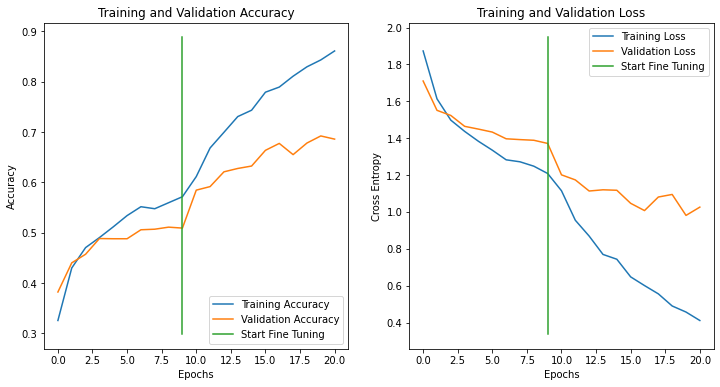

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(loss)), acc, label='Training Accuracy')
plt.plot(range(len(loss)), val_acc, label='Validation Accuracy')
plt.plot(
  [initial_epochs-1,initial_epochs-1], 
  plt.ylim(),
  label='Start Fine Tuning'
)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(loss)), val_loss, label='Validation Loss')
plt.plot(
    [initial_epochs-1,initial_epochs-1],
    plt.ylim(),
    label='Start Fine Tuning'
)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy :', accuracy)

135/135 [==============================] - 23s 171ms/step - loss: 1.0260 - accuracy: 0.6860
Test accuracy : 0.6859903335571289


# Prediction

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing import image

In [ ]:
image_batch, label_batch = validation_generator.next()

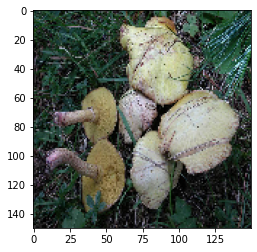

In [ ]:
i = 7
imgplot = plt.imshow(image_batch[i])

In [ ]:
x = image.img_to_array(image_batch[i])
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
images

array([[[[0.1137255 , 0.10588236, 0.05882353],
         [0.07450981, 0.15686275, 0.16862746],
         [0.09411766, 0.19215688, 0.16862746],
         ...,
         [0.04313726, 0.10588236, 0.09411766],
         [0.        , 0.1254902 , 0.06666667],
         [0.04705883, 0.17254902, 0.12941177]],

        [[0.22352943, 0.29411766, 0.20000002],
         [0.01568628, 0.15686275, 0.11764707],
         [0.14901961, 0.24705884, 0.22352943],
         ...,
         [0.        , 0.10196079, 0.09411766],
         [0.04705883, 0.20000002, 0.18039216],
         [0.22352943, 0.25490198, 0.29803923]],

        [[0.3254902 , 0.37647063, 0.30588236],
         [0.1254902 , 0.24705884, 0.18823531],
         [0.12156864, 0.22352943, 0.18823531],
         ...,
         [0.03921569, 0.21568629, 0.18823531],
         [0.19215688, 0.36078432, 0.3254902 ],
         [0.19607845, 0.43529415, 0.27450982]],

        ...,

        [[0.        , 0.01960784, 0.00392157],
         [0.        , 0.01568628, 0.        ]

In [ ]:
label_batch[i]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
label_pred = model.predict(images)
label_pred

array([[1.10966349e-02, 1.04711037e-02, 3.33786793e-02, 2.10067946e-02,
        2.76119485e-02, 1.08183165e-04, 8.40486959e-02, 1.00821629e-01,
        7.11456358e-01]], dtype=float32)

In [ ]:
label_pred+1

array([[1.0110966, 1.0104711, 1.0333787, 1.0210068, 1.027612 , 1.0001082,
        1.0840487, 1.1008216, 1.7114563]], dtype=float32)

In [ ]:
label_pred == label_batch[i]

array([[False, False, False, False, False, False, False, False, False]])

In [ ]:
import tensorflow as tf

In [ ]:
sg = tf.nn.sigmoid(label_pred)
sf = tf.nn.softmax(label_pred)
sf

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.09783185, 0.09777068, 0.10003621, 0.09880621, 0.099461  ,
        0.09676272, 0.10523567, 0.10701567, 0.19708005]], dtype=float32)>

In [ ]:
train_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

In [ ]:
np.max(label_pred), np.argmax(label_pred)

(0.71145636, 8)

In [ ]:
lbl_pred = np.array(tf.where(sf == np.max(sf), 1, 0))
lbl_pred = lbl_pred.astype("float32")
lbl_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.array_str(lbl_pred[0]), np.array_str(label_batch[i])

('[0. 0. 0. 0. 0. 0. 0. 0. 1.]', '[0. 0. 0. 0. 0. 0. 0. 0. 1.]')

In [ ]:
lbl_pred[0] == label_batch[i]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
np.array_str(lbl_pred[0]) == np.array_str(label_batch[i])

True

In [ ]:
sf[0]

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.09783185, 0.09777068, 0.10003621, 0.09880621, 0.099461  ,
       0.09676272, 0.10523567, 0.10701567, 0.19708005], dtype=float32)>

In [ ]:
np.max(sf)

0.19708005

In [ ]:
clf = np.where(sf[0] == np.max(sf))[0][0]
clf

8

In [ ]:
train_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

In [ ]:
list(train_generator.class_indices.keys())[clf]

'Suillus'

In [ ]:
image_batch, label_batch = validation_generator.next()
i=2
x = np.expand_dims(image.img_to_array(image_batch[i]), axis=0)
im_pred = model.predict(np.vstack([x]))
sg = tf.nn.sigmoid(im_pred)
sf = tf.nn.softmax(im_pred)

In [ ]:
label_batch[i]

array([0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.where(label_batch[i] == 1)[0][0]

3

# Predict Batch of validation datasets

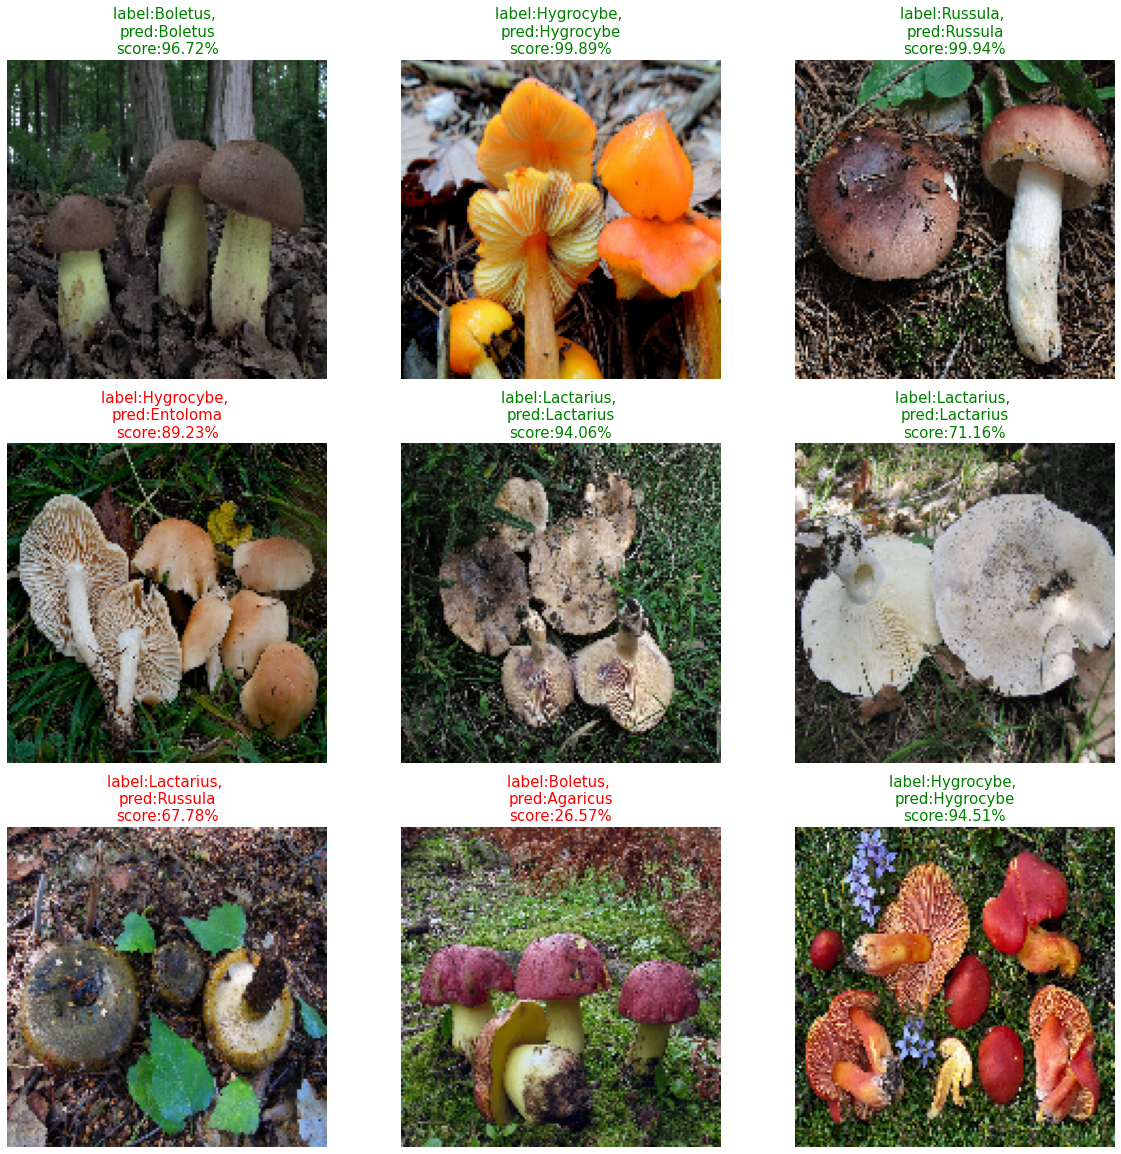

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = validation_generator.next()

plt.figure(figsize=(20, 20))
for i in range(9):

  x = np.expand_dims(image.img_to_array(image_batch[i]), axis=0)
  im_pred = model.predict(np.vstack([x]))
  # sg = tf.nn.sigmoid(im_pred)
  # sf = tf.nn.softmax(im_pred)
  lp = im_pred
  lbl_pred = np.array(tf.where(lp == np.max(lp), 1, 0)).astype("float32")
  compare = np.array_str(lbl_pred[0]) == np.array_str(label_batch[i])
  clf_pr = np.where(lp[0] == np.max(lp))[0][0]
  clf_lb = np.where(label_batch[i] == 1)[0][0]
  pred = list(train_generator.class_indices.keys())[clf_pr]
  label = list(train_generator.class_indices.keys())[clf_lb]

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  plt.title(
      label=f"label:{label}, \npred:{pred}\nscore:{(np.max(lp)*100):.2f}%",
      color=('r' if compare==False else 'g'), 
      fontdict={'fontsize':15} 
  )
  plt.axis("off")

# Deploy

In [ ]:
# save Model

## to json
model_json = model.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)

## to h5
model.save("model/model.h5")
model.save_weights('model/model_weights.h5')
print('Model Saved!')

Model Saved!


In [ ]:
## to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1jisec6l/assets


INFO:tensorflow:Assets written to: /tmp/tmp1jisec6l/assets


In [ ]:
shutil.make_archive("model", "zip", "model")

'/content/model.zip'

In [ ]:
# load model

## load json file
from keras.models import model_from_json 
json_file = open('model/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
savedModelJSON = model_from_json(loaded_model_json)

## load h5 file
from keras.models import load_model
savedModel = load_model('model/model.h5')
savedModelWeight = savedModel.load_weights('model/model_weights.h5')
print('Model Loaded!')

savedModel.summary()